In [1]:
"""
TODO: Remove singly connected components by convolving with 3x3 filter and removint if conv result = 0
"""

import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt
import skimage
import sys
from skimage.filters import threshold_otsu, rank
from skimage.morphology import disk
from scipy import stats
from skimage import feature
from scipy.ndimage.morphology import binary_closing
from tqdm import tnrange

In [45]:
#Labelling functions for the data 

#Load the data

# scan_path = "/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Cystic Dataset/Train/92" # TODO: Change this to match where your data is located!

# slice_num = 5
# slice_path = os.path.join(scan_path,list_of_slices[slice_num])
# print(slice_path)


slice_path = "/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Cystic Dataset/Test/168/CT-0002-0007.dcm"
scan_path = "/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Cystic Dataset/Test/185/"
list_of_slices = os.listdir(scan_path)

# read in the full path to the file as ds
ds=pydicom.read_file(slice_path) # you may have to use pydicom instead of dicom 
print(ds)

(0008, 0000) Group Length                        UL: 186
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113619.2.30.1.1762288805.2022.1041610247.23
(0008, 0020) Study Date                          DA: '20030108'
(0008, 0030) Study Time                          TM: '124413.000000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CT'
(0008, 0090) Referring Physician's Name          PN: ' '
(0008, 103e) Series Description                  LO: ''
(0010, 0000) Group Length                        UL: 68
(0010, 0010) Patient's Name                      PN: 'Anonymous'
(0010, 0020) Patient ID                          LO: 'Anonymous-ID'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age              

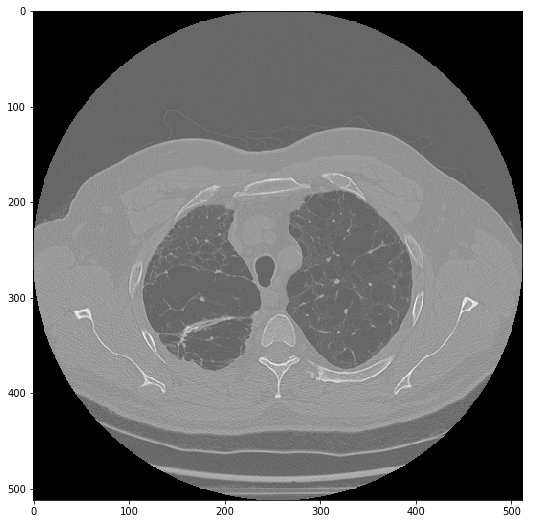

In [46]:
plt.imshow(ds.pixel_array, cmap='gray')
plt.rcParams['figure.figsize'] = (15,9)
plt.show()

In [47]:
img = np.asarray(ds.pixel_array)
mask_path = "/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Cystic Dataset/Test/168/lung_mask/lung_mask_2_7.dcm"
mask=np.asarray(pydicom.read_file(mask_path).pixel_array)
mask[mask>0] = 1
img_filtered = img*mask

intercept = ds.RescaleIntercept
slope = ds.RescaleSlope


img_filtered = img_filtered*slope + intercept

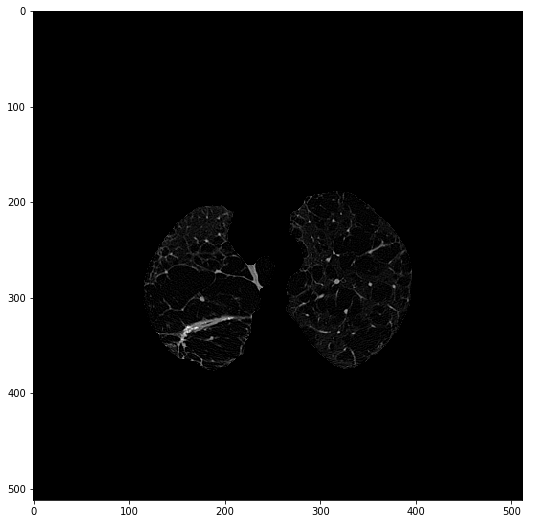

In [48]:
plt.imshow(img_filtered, cmap='gray')
plt.rcParams['figure.figsize'] = (15,9)
plt.show()

In [49]:
from skimage.filters import threshold_otsu
img_filtered = np.float32(img_filtered)
img_filtered_norm = (img_filtered + abs(np.min(img_filtered)))/(np.max(img_filtered) + abs(np.min(img_filtered))) #normalizing
thresh =  np.percentile(img_filtered_norm[img_filtered_norm > 0], 35)
# thresh = np.median(img_filtered_norm[img_filtered_norm > 0])
# thresh = threshold_otsu(img_filtered_norm)
thresh = -500
print(thresh)

-500


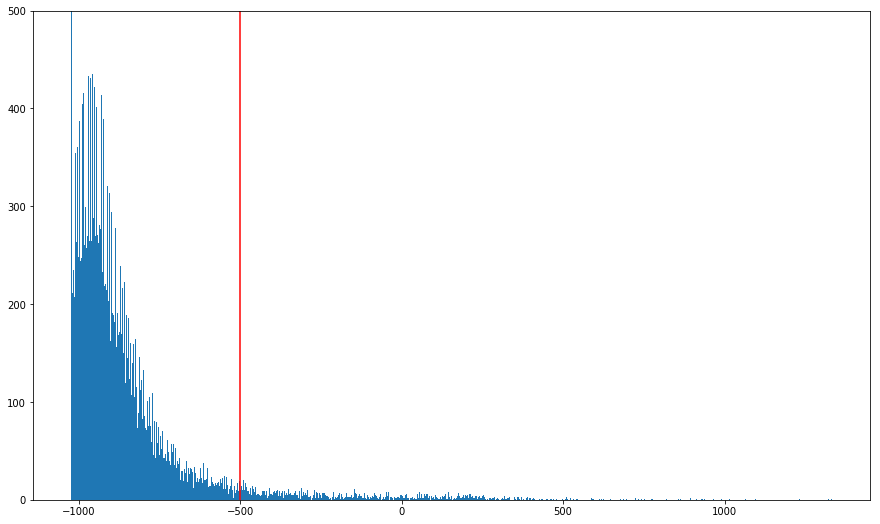

In [50]:
_ = plt.hist(img_filtered.reshape([-1]), 1000)
plt.ylim([0, 500])
plt.plot([thresh, thresh], [0, 500], 'r')

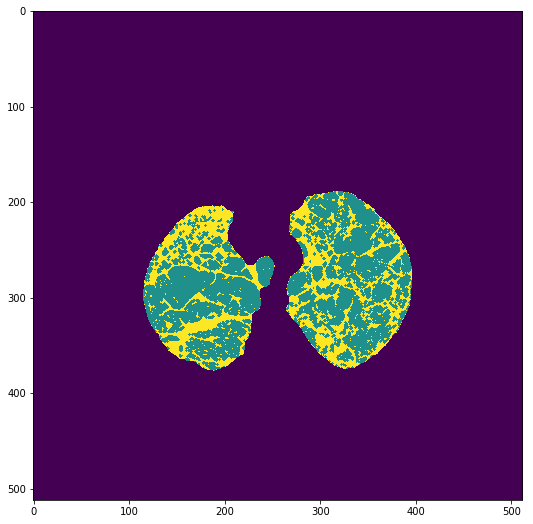

In [56]:
cysts_im = img_filtered > -850
cysts_im = 1*binary_closing(cysts_im)
cysts_im += mask

from scipy.signal import medfilt

plt.imshow(cysts_im)
plt.rcParams['figure.figsize'] = (15,9)

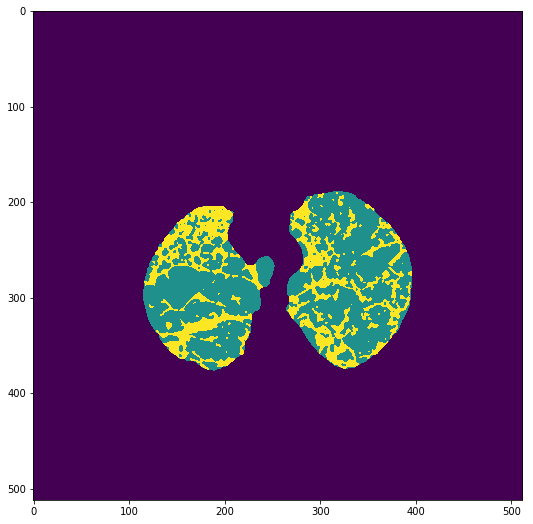

In [57]:
cysts_im = medfilt(cysts_im)
plt.imshow(cysts_im)
plt.rcParams['figure.figsize'] = (15,9)

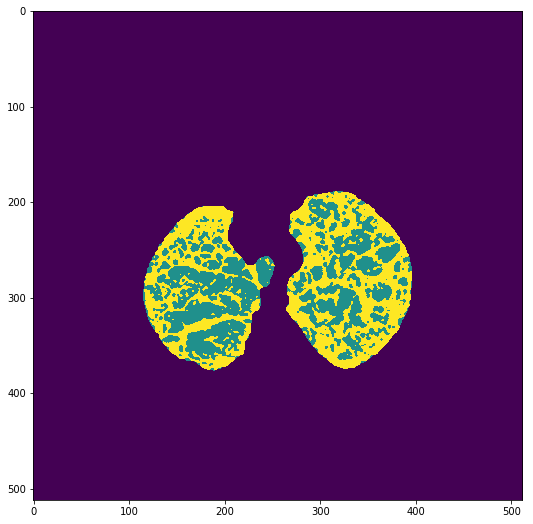

In [55]:
from skimage.filters import threshold_local
thresh = threshold_local(img_filtered_norm, block_size=63)
cysts_im = img_filtered_norm > thresh
cysts_im = 1*binary_closing(cysts_im)
cysts_im += mask
cysts_im = medfilt(cysts_im)

plt.imshow(cysts_im)
plt.rcParams['figure.figsize'] = (15,9)